# Lab 5. Fuzzy Systems
# Task 5.3 Washing Machine Fuzzy Controller
## Problem Descriptions
will develop such a fuzzy controller for washing machines. For simplicity, we only
consider two input variables and one output variable. Their linguistic values are.

* Degree of Dirtiness: SD(small), MD(medium), LD(large)

* Size of Load of Clothes: SL(small), ML(medium), LL(large)

* Washing Time: VS(very short), S(short), M(medium),

* L(long), VL(very long)


rules are below:--

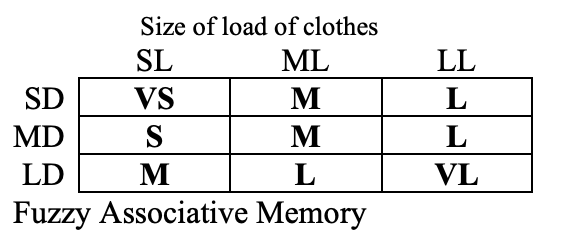
## Implementation and Results

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

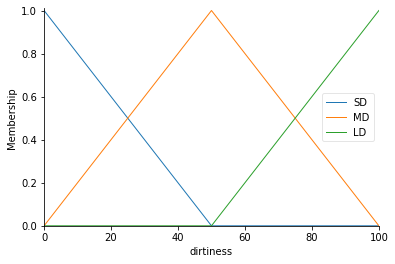

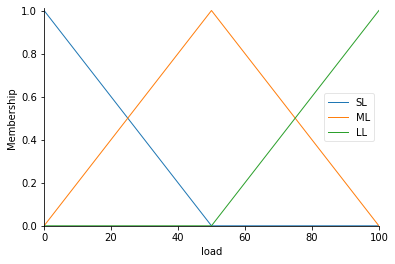

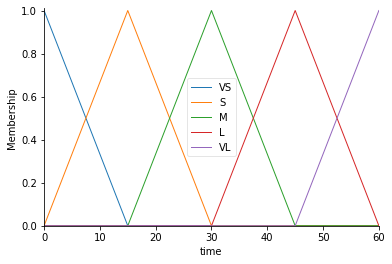

In [ ]:
# Linguistic variables for antecedents/consequent
dirtiness = ctrl.Antecedent(np.arange(0, 101, 1), 'dirtiness')
load = ctrl.Antecedent(np.arange(0, 101, 1), 'load')
time = ctrl.Consequent(np.arange(0, 61, 1), 'time')

# membership functions for each linguistic values
dirtiness.automf(3, names=['SD', 'MD', 'LD'])
load.automf(3, names=['SL', 'ML', 'LL'])
time.automf(5, names=['VS', 'S', 'M', 'L', 'VL'])

dirtiness.view()
load.view()
time.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(dirtiness['SD'] & load['SL'], time['VS'])
rule2 = ctrl.Rule(dirtiness['SD'] & load['ML'], time['M'])
rule3 = ctrl.Rule(dirtiness['SD'] & load['LL'], time['L'])
rule4 = ctrl.Rule(dirtiness['MD'] & load['SL'], time['S'])
rule5 = ctrl.Rule(dirtiness['MD'] & load['ML'], time['M'])
rule6 = ctrl.Rule(dirtiness['MD'] & load['LL'], time['L'])
rule7 = ctrl.Rule(dirtiness['LD'] & load['SL'], time['M'])
rule8 = ctrl.Rule(dirtiness['LD'] & load['ML'], time['L'])
rule9 = ctrl.Rule(dirtiness['LD'] & load['LL'], time['VL'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Washing time: 36.650793650793666


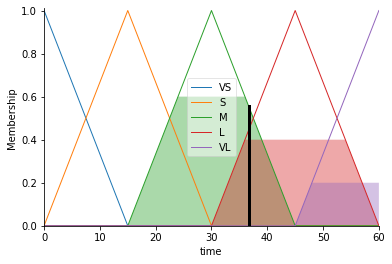

In [ ]:
# Pass inputs to the ControlSystem 
ctrl_sim.inputs({'dirtiness': 60, 'load': 70})

# Crunch the numbers
ctrl_sim.compute()
print("Washing time:", ctrl_sim.output['time'])
time.view(sim=ctrl_sim)


## Discussions

fuzzzification:  bases on liguistic variables we do fuzzification of rules.

we have used skfuzzy library for predefined fuzzy functions.


defuzification method:- Defuzzification is the process of obtaining a single number from the output of the aggregated fuzzy set.

input to our engine is:

 degree of dirtiness is 60

 load is 70

 based on the inputs our output is  36.6.
